<a href="https://colab.research.google.com/github/NaruedechKlaikaew/SeniorProject/blob/main/ProjectXD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


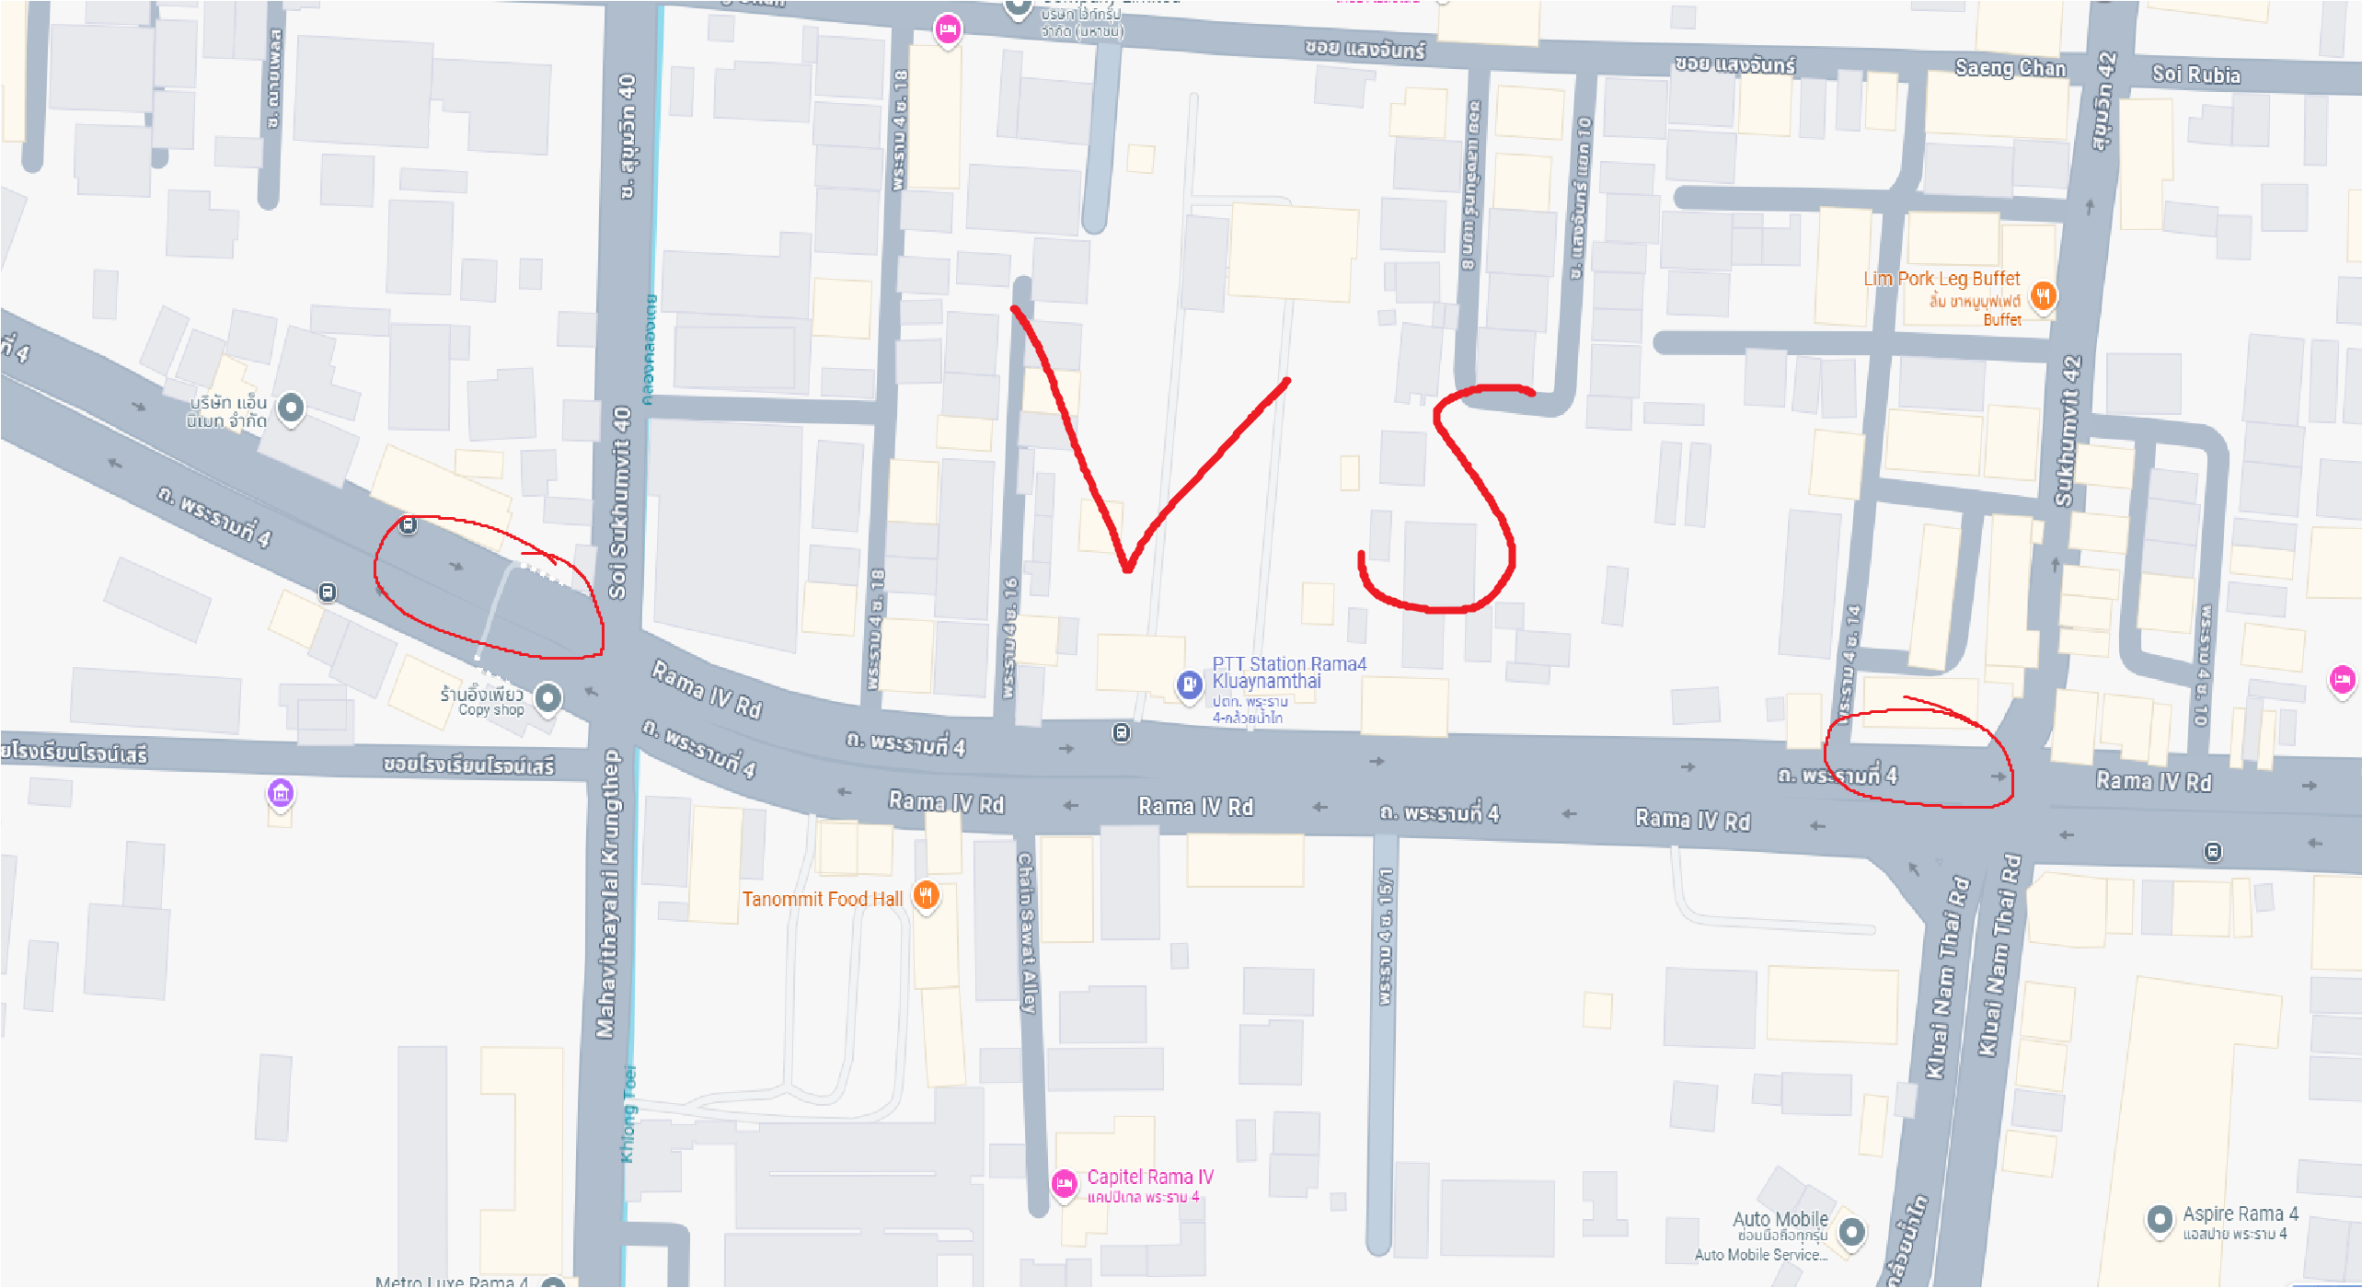

# ก่อนแยก A

In [ ]:
df1_6 = pd.read_csv('/content/drive/MyDrive/Project/rama4_right_BF_SOI-BAN-KLUAY-THAI-M6_-2.csv')
df1_7 = pd.read_csv('/content/drive/MyDrive/Project/rama4_right_BF_SOI-BAN-KLUAY-THAI-M7_.csv')
df1_8 = pd.read_csv('/content/drive/MyDrive/Project/rama4_right_BF_SOI-BAN-KLUAY-THAI-M8_-2.csv')

In [ ]:
df1 = pd.concat([df1_6, df1_7, df1_8])
#df1 = pd.read_csv('/content/drive/MyDrive/Project/rama4_right_bf_SOI-BAN-KLUAY-THAI_.csv')

In [ ]:
df1 = df1[df1['speed'] >= 0]

In [ ]:
df1['Datetime'] = pd.to_datetime(df1['date'].astype(str) + ' ' + df1['time'].astype(str))
df1["hour"] = df1["Datetime"].dt.hour

In [ ]:
df1

,driverid,wayids,date,time,speed,projectedlat,projectedlng,Datetime,hour
0,291841fd193c4681fe39be66c288ea99a29d379a4ca4f9...,300813736,2019-06-01,14:41:52,10.24,13.713829,100.579411,2019-06-01 14:41:52,14
1,dd139866f6176beb79f7306fd177cd40be0f55e8283816...,300813736,2019-06-02,01:38:43,14.79,13.713673,100.579767,2019-06-02 01:38:43,1
2,dd139866f6176beb79f7306fd177cd40be0f55e8283816...,300813736,2019-06-02,01:38:47,13.39,13.713465,100.580241,2019-06-02 01:38:47,1
3,4ea07e928a82ae3e875dfc845d650338098904497fe34e...,300813736,2019-06-01,12:58:20,13.72,13.713807,100.579459,2019-06-01 12:58:20,12
4,4ea07e928a82ae3e875dfc845d650338098904497fe34e...,300813736,2019-06-01,12:58:24,11.97,13.713621,100.579884,2019-06-01 12:58:24,12
...,...,...,...,...,...,...,...,...,...
402962,6d1f29801cedee2c7164adc0841159d6c5bd87a71462a5...,300813736,2019-08-04,10:26:10,6.07,13.713829,100.579409,2019-08-04 10:26:10,10
402963,6d1f29801cedee2c7164adc0841159d6c5bd87a71462a5...,300813736,2019-08-04,10:26:14,4.84,13.713747,100.579597,2019-08-04 10:26:14,10
402964,6d1f29801cedee2c7164adc0841159d6c5bd87a71462a5...,300813736,2019-08-04,10:26:18,2.50,13.713695,100.579716,2019-08-04 10:26:18,10
402965,6d1f29801cedee2c7164adc0841159d6c5bd87a71462a5...,300813736,2019-08-04,10:26:36,5.47,13.713468,100.580234,2019-08-04 10:26:36,10


In [ ]:
#vf = df1.groupby(df1['date'])['speed'].max()

In [ ]:
va = df1.groupby([df1['date'], df1['hour']])['speed'].mean()
vf = va.reset_index().groupby('date')['speed'].max()

In [ ]:
# Reset the index of both series to facilitate merging
vf = vf.reset_index()
va = va.reset_index()

# Merge the two series based on the 'date' column
merged_df = pd.merge(va, vf, on='date', how='left', suffixes=('_avg', '_max'))

# Rename columns for clarity
merged_df = merged_df.rename(columns={'speed_avg': 'va', 'speed_max': 'vf'})

# Display the merged DataFrame
merged_df

,date,hour,va,vf
0,2019-06-01,6,4.798571,7.462107
1,2019-06-01,7,5.049910,7.462107
2,2019-06-01,8,5.473950,7.462107
3,2019-06-01,9,5.263408,7.462107
4,2019-06-01,10,5.477627,7.462107
...,...,...,...,...
2183,2019-08-31,19,5.151061,7.897579
2184,2019-08-31,20,4.780508,7.897579
2185,2019-08-31,21,4.710400,7.897579
2186,2019-08-31,22,5.723590,7.897579


In [ ]:
merged_df['TPI'] = merged_df['va'] / merged_df['vf']

In [ ]:
a = merged_df.groupby([merged_df['date'], merged_df['hour']])['TPI'].mean()

In [ ]:
a = a.reset_index()

In [ ]:
a

,date,hour,TPI
0,2019-06-01,6,0.643059
1,2019-06-01,7,0.676740
2,2019-06-01,8,0.733566
3,2019-06-01,9,0.705351
4,2019-06-01,10,0.734059
...,...,...,...
2183,2019-08-31,19,0.652233
2184,2019-08-31,20,0.605313
2185,2019-08-31,21,0.596436
2186,2019-08-31,22,0.724727


In [ ]:
def remove_outliers_per_hour(df, column_name):
    """Removes outliers from a DataFrame based on hourly data using IQR.

    Args:
        df: The input DataFrame with 'date', 'hour', and the specified column.
        column_name: The name of the column to remove outliers from.

    Returns:
        A new DataFrame with outliers removed.
    """

    df_no_outliers = pd.DataFrame()
    for hour in df['hour'].unique():
        hourly_data = df[df['hour'] == hour]
        Q1 = hourly_data[column_name].quantile(0.25)
        Q3 = hourly_data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_data = hourly_data[
            (hourly_data[column_name] >= lower_bound) &
            (hourly_data[column_name] <= upper_bound)
        ]
        df_no_outliers = pd.concat([df_no_outliers, filtered_data])
    return df_no_outliers

# Example usage:
a= remove_outliers_per_hour(a, 'TPI')
a


,date,hour,TPI
0,2019-06-01,6,0.643059
24,2019-06-02,6,0.563938
48,2019-06-03,6,0.472742
72,2019-06-04,6,0.465484
96,2019-06-05,6,0.370148
...,...,...,...
2073,2019-08-27,5,0.530787
2097,2019-08-28,5,0.850955
2121,2019-08-29,5,0.927787
2145,2019-08-30,5,0.411512


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

hourly_avg_tpi = a.groupby('hour')['TPI'].mean()
fig = px.scatter(a, x="hour", y="TPI", color="date")
fig.add_trace(go.Scatter(x=hourly_avg_tpi.index, y=hourly_avg_tpi.values,
                         mode='lines', name='Average TPI per Hour', line=dict(color='red')))
fig.add_shape(
    type="line",
    x0=0,
    y0=0.48,
    x1=23,
    y1=0.48,
    line=dict(color="black", dash="dash"),
)
fig.show()



In [ ]:
fig = go.Figure()

for hour in a["hour"].unique():
    fig.add_trace(go.Box(y=a[a["hour"] == hour]["TPI"], name=str(hour)))

fig.update_layout(title="Box Plot of TPI for Each Hour 3M",
                  yaxis_title="TPI",
                  xaxis_title="Hour")

fig.add_shape(
    type="line",
    x0=0,
    y0=0.48,
    x1=23,
    y1=0.48,
    line=dict(color="green", dash="dash"),
)
fig.show()

In [ ]:
import numpy as np
from scipy.stats import shapiro

for i in range(24):
# สมมุติว่าคุณมีข้อมูลเป็น array หรือ list
    data =a[a['hour'] == i]['TPI'].to_numpy()  # <-- เอาข้อมูลของคุณใส่ตรงนี้

# ทำ Shapiro-Wilk Test
    stat, p = shapiro(data)

    print('เวลา:', i)
    print('สถิติการทดสอบ (Statistic):', stat)
    print('ค่า p-value:', p)

# ตีความผล
    alpha = 0.05  # กำหนดระดับนัยสำคัญ (5%)
    if p > alpha:
        print('สรุป: ข้อมูลเป็นการแจกแจงแบบปกติ (Fail to reject H0)')
        print('--------------------------------------')
    else:
        print('สรุป: ข้อมูลไม่ใช่การแจกแจงแบบปกติ (Reject H0)')
        print('--------------------------------------')


เวลา: 0
สถิติการทดสอบ (Statistic): 0.9863905010348877
ค่า p-value: 0.4826468967555575
สรุป: ข้อมูลเป็นการแจกแจงแบบปกติ (Fail to reject H0)
--------------------------------------
เวลา: 1
สถิติการทดสอบ (Statistic): 0.9694494607103857
ค่า p-value: 0.03560765128657869
สรุป: ข้อมูลไม่ใช่การแจกแจงแบบปกติ (Reject H0)
--------------------------------------
เวลา: 2
สถิติการทดสอบ (Statistic): 0.9248036020845091
ค่า p-value: 8.327391666867402e-05
สรุป: ข้อมูลไม่ใช่การแจกแจงแบบปกติ (Reject H0)
--------------------------------------
เวลา: 3
สถิติการทดสอบ (Statistic): 0.9039995865276561
ค่า p-value: 6.821124703251114e-06
สรุป: ข้อมูลไม่ใช่การแจกแจงแบบปกติ (Reject H0)
--------------------------------------
เวลา: 4
สถิติการทดสอบ (Statistic): 0.8697951874952091
ค่า p-value: 2.5664731580900584e-07
สรุป: ข้อมูลไม่ใช่การแจกแจงแบบปกติ (Reject H0)
--------------------------------------
เวลา: 5
สถิติการทดสอบ (Statistic): 0.9674629001688669
ค่า p-value: 0.024724855720177942
สรุป: ข้อมูลไม่ใช่การแจกแจงแบบปกติ 

In [ ]:
import pandas as pd

# Create an empty list to store the results
results = []

for i in range(24):
    data = a[a['hour'] == i]['TPI'].to_numpy()
    stat, p = shapiro(data)
    alpha = 0.05
    conclusion = "Normal Distribution (Fail to reject H0)" if p > alpha else "Not Normal Distribution (Reject H0)"
    results.append([i, stat, p, conclusion])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Hour', 'Statistic', 'p-value', 'Conclusion'])

# Display the DataFrame
results_df


,Hour,Statistic,p-value,Conclusion
0,0,0.986391,4.826469e-01,Normal Distribution (Fail to reject H0)
1,1,0.969449,3.560765e-02,Not Normal Distribution (Reject H0)
2,2,0.924804,8.327392e-05,Not Normal Distribution (Reject H0)
3,3,0.904000,6.821125e-06,Not Normal Distribution (Reject H0)
4,4,0.869795,2.566473e-07,Not Normal Distribution (Reject H0)
5,5,0.967463,2.472486e-02,Not Normal Distribution (Reject H0)
6,6,0.981489,2.353166e-01,Normal Distribution (Fail to reject H0)
7,7,0.986436,4.774469e-01,Normal Distribution (Fail to reject H0)
8,8,0.988264,6.191607e-01,Normal Distribution (Fail to reject H0)
9,9,0.986280,4.593530e-01,Normal Distribution (Fail to reject H0)


In [ ]:
pivot_table = pd.pivot_table(a, values='TPI', index='date', columns='hour', aggfunc='mean')

pivot_table


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,NaN,NaN,NaN,NaN,NaN,NaN,0.643059,0.676740,0.733566,0.705351,...,0.711398,0.647175,0.583293,0.536565,0.497574,0.637694,0.664751,0.647728,0.772849,1.000000
2019-06-02,0.838857,0.805945,1.000000,0.948304,0.907798,0.620463,0.563938,0.646087,0.586426,0.443025,...,0.517674,0.553976,0.517437,0.476854,0.637440,0.603415,0.535578,0.494147,0.672816,0.724495
2019-06-03,0.708940,0.753129,0.608335,0.815792,1.000000,0.577042,0.472742,0.498413,0.415910,0.446991,...,0.492745,0.429344,0.474278,0.500685,0.452180,0.463869,0.411601,0.413004,0.565188,0.668677
2019-06-04,0.727689,0.809786,1.000000,0.623470,0.935100,0.824306,0.465484,0.604144,0.442282,0.394583,...,0.590306,0.538050,0.534511,0.463748,0.447126,0.552142,0.464541,0.495717,0.684194,0.724908
2019-06-05,0.517825,0.482381,0.581289,1.000000,0.541808,0.332906,0.370148,0.397321,0.385117,0.342084,...,0.356251,0.271714,0.316044,0.363302,0.361825,0.321166,0.329947,0.357176,0.435441,0.420211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-27,0.458603,0.683205,0.578124,1.000000,0.651731,0.530787,0.253843,NaN,0.339623,0.313284,...,0.333766,0.360501,0.347153,0.216733,NaN,NaN,NaN,0.298388,0.448192,0.472439
2019-08-28,0.823666,0.818217,0.910116,0.876474,1.000000,0.850955,0.682458,0.618197,0.657947,0.514029,...,0.235651,0.560646,0.602109,0.256001,0.329834,0.531033,0.676274,0.608857,0.694096,0.847980
2019-08-29,0.741402,0.828867,1.000000,0.824966,0.803989,0.927787,0.530721,0.549004,0.623724,0.605890,...,0.157733,0.177715,0.305762,0.243310,0.430736,0.549001,0.505945,0.560099,0.650410,0.724669


In [ ]:
import numpy as np

# ข้อมูลตั้งต้น
tpi_1600_1700 = a[a['hour']== 16]['TPI'].to_numpy()

tpi_1700_1800 = a[a['hour']== 17]['TPI'].to_numpy()

# รวมข้อมูลเป็น (30, 2)
tpi_all = np.stack((tpi_1600_1700, tpi_1700_1800), axis=1)

def find_outliers(arr):
    """หา index ของ outlier ด้วย IQR method"""
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_idx = np.where((arr < lower_bound) | (arr > upper_bound))[0]
    return outlier_idx

# ตัดจาก 16:00-17:00 ก่อน
outliers_1600_1700 = find_outliers(tpi_all[:, 0])
tpi_all = np.delete(tpi_all, outliers_1600_1700, axis=0)

# ตัดจาก 17:00-18:00 ต่อ
outliers_1700_1800 = find_outliers(tpi_all[:, 1])
tpi_all = np.delete(tpi_all, outliers_1700_1800, axis=0)

# แยกกลับมาเป็น array
tpi_1600_1700_clean = tpi_all[:, 0]
tpi_1700_1800_clean = tpi_all[:, 1]

# export
print("tpi_1600_1700_clean =", tpi_1600_1700_clean)
print("tpi_1700_1800_clean =", tpi_1700_1800_clean)

tpi_1600_1700_clean = [0.58329344 0.51743702 0.47427805 0.53451076 0.3160439  0.416439
 0.13142817 0.49745397 0.66011187 0.3091846  0.38881763 0.39396944
 0.5141699  0.12399877 0.54485394 0.52064721 0.527692   0.21069478
 0.43371103 0.46902037 0.10416032 0.52201714 0.44572329 0.44425329
 0.42791708 0.37683101 0.35403705 0.5585785  0.31120136 0.56717813
 0.56715534 0.42192793 0.44054849 0.51835707 0.47693726 0.38162531
 0.57632774 0.51636307 0.52648351 0.69921242 0.29624125 0.22114945
 0.51114625 0.50301314 0.57472297 0.41656326 0.50862792 0.43685692
 0.32819946 0.62234687 0.51453226 0.43202504 0.31128174 0.30302426
 0.36080235 0.36515743 0.53423663 0.54850229 0.45423181 0.55480744
 0.62849723 0.69608205 0.4274385  0.12122944 0.50624796 0.40888053
 0.45957869 0.54970591 0.66810988 0.14007821 0.36347957 0.48650129
 0.6113885  0.39386358 0.49445233 0.33144913 0.4168991  0.51431024
 0.29489928 0.36116456 0.2937507  0.18383161 0.11926666 0.38172242
 0.24781717 0.49190873 0.48874179 0.347153

In [ ]:
#หารถหยุดนิ่งว่ากี่โมง
df1["is_stopped"] = df1["speed"] == 0  # ถ้าความเร็วเป็น 0 ให้กำหนดเป็น True (หยุดนิ่ง)
stop_frequency = df1[df1["is_stopped"]].groupby("hour")["Datetime"].count()
print("จำนวนครั้งที่รถหยุดในแต่ละชั่วโมง:\n", stop_frequency)


จำนวนครั้งที่รถหยุดในแต่ละชั่วโมง:
 hour
0      5134
1      3405
2      2265
3      1444
4      1059
5      1587
6      3540
7      5622
8      9232
9     12708
10    14435
11    17887
12    18185
13    20246
14    22674
15    21525
16    22953
17    25269
18    22406
19    19789
20    19478
21    17969
22    10600
23     6379
Name: Datetime, dtype: int64


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=stop_frequency.index, y=stop_frequency.values))
fig.update_layout(
    title="Frequency of Stops by Hour",
    xaxis_title="Hour of the Day",
    yaxis_title="Number of Stops",
    xaxis=dict(tickmode='linear', tick0=0, dtick=1)
)
fig.show()


In [ ]:
pivot_table.to_csv('Road-A.csv')
from google.colab import files
files.download('Road-A.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ระหว่างแยก A ถึง B

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project/rama4_right_AF_SOI-BAN-KLUAY-THAI_.csv')
df1 = df1[df1['speed'] >= 0]
df1['Datetime'] = pd.to_datetime(df1['date'].astype(str) + ' ' + df1['time'].astype(str))
df1["hour"] = df1["Datetime"].dt.hour




In [ ]:
va = df1.groupby([df1['date'], df1['hour']])['speed'].mean()
vf = va.reset_index().groupby('date')['speed'].max()

In [ ]:
# Reset the index of both series to facilitate merging
vf = vf.reset_index()
va = va.reset_index()

# Merge the two series based on the 'date' column
merged_df = pd.merge(va, vf, on='date', how='left', suffixes=('_avg', '_max'))

# Rename columns for clarity
merged_df = merged_df.rename(columns={'speed_avg': 'va', 'speed_max': 'vf'})

# Display the merged DataFrame
merged_df

,date,hour,va,vf
0,2019-06-01,6,15.940000,15.94000
1,2019-06-01,7,8.977005,15.94000
2,2019-06-01,8,5.334527,15.94000
3,2019-06-01,9,6.718618,15.94000
4,2019-06-01,10,6.287535,15.94000
...,...,...,...,...
709,2019-06-30,19,4.065035,9.19904
710,2019-06-30,20,4.285570,9.19904
711,2019-06-30,21,5.003832,9.19904
712,2019-06-30,22,6.602781,9.19904


In [ ]:
merged_df['TPI'] = merged_df['va'] / merged_df['vf']
a = merged_df.groupby([merged_df['date'], merged_df['hour']])['TPI'].mean().reset_index()

In [ ]:
def remove_outliers_per_hour(df, column_name):
    """Removes outliers from a DataFrame based on hourly data using IQR.

    Args:
        df: The input DataFrame with 'date', 'hour', and the specified column.
        column_name: The name of the column to remove outliers from.

    Returns:
        A new DataFrame with outliers removed.
    """

    df_no_outliers = pd.DataFrame()
    for hour in df['hour'].unique():
        hourly_data = df[df['hour'] == hour]
        Q1 = hourly_data[column_name].quantile(0.25)
        Q3 = hourly_data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_data = hourly_data[
            (hourly_data[column_name] >= lower_bound) &
            (hourly_data[column_name] <= upper_bound)
        ]
        df_no_outliers = pd.concat([df_no_outliers, filtered_data])
    return df_no_outliers

# Example usage:
a= remove_outliers_per_hour(a, 'TPI')
a


,date,hour,TPI
0,2019-06-01,6,1.000000
24,2019-06-02,6,0.590218
48,2019-06-03,6,0.610298
72,2019-06-04,6,0.495827
96,2019-06-05,6,0.491048
...,...,...,...
599,2019-06-26,5,1.000000
623,2019-06-27,5,1.000000
647,2019-06-28,5,0.642967
671,2019-06-29,5,1.000000


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

hourly_avg_tpi = a.groupby('hour')['TPI'].mean()
fig = px.scatter(a, x="hour", y="TPI", color="date")
fig.add_trace(go.Scatter(x=hourly_avg_tpi.index, y=hourly_avg_tpi.values,
                         mode='lines', name='Average TPI per Hour', line=dict(color='red')))

fig.show()

In [ ]:
fig = go.Figure()

for hour in a["hour"].unique():
    fig.add_trace(go.Box(y=a[a["hour"] == hour]["TPI"], name=str(hour)))

fig.update_layout(title="Box Plot of TPI for Each Hour 3M",
                  yaxis_title="TPI",
                  xaxis_title="Hour")

fig.add_shape(
    type="line",
    x0=0,
    y0=0.48,
    x1=23,
    y1=0.48,
    line=dict(color="green", dash="dash"),
)
fig.show()

In [ ]:

pivot_table = pd.pivot_table(a, values='TPI', index='date', columns='hour', aggfunc='mean')

pivot_table


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.563175,0.334663,0.421494,...,0.300456,0.337009,0.306962,0.192664,0.202249,0.297683,0.319485,0.312639,0.293069,0.346301
2019-06-02,0.754192,0.839858,0.814172,0.881607,0.904427,1.000000,0.590218,0.853000,0.701320,0.587402,...,0.522736,0.559627,0.632423,0.578948,0.648864,0.644134,0.596775,0.553351,0.690405,0.731870
2019-06-03,0.601139,0.641574,0.798743,0.654355,1.000000,0.715930,0.610298,0.620172,0.608707,0.520339,...,0.547404,0.420975,0.452256,0.517851,0.526037,0.494055,0.478412,0.541921,0.587983,0.667470
2019-06-04,0.720249,0.775639,0.828154,1.000000,0.704709,0.765756,0.495827,0.371835,0.400114,0.385602,...,0.510065,0.426904,0.455106,0.520367,0.522250,0.473816,0.332116,0.426797,0.449969,0.544742
2019-06-05,0.740927,0.808717,0.729576,0.647370,1.000000,0.558062,0.491048,0.423441,0.425993,0.528606,...,0.357996,0.428291,0.481714,0.446400,0.464477,0.452859,0.353212,0.471685,0.532542,0.546842
2019-06-06,0.820121,0.867431,0.951635,0.977082,1.000000,0.912431,0.853114,0.523016,0.481321,0.688746,...,0.469783,0.367620,0.492548,0.573444,0.240038,0.641549,0.350215,0.327949,0.554677,0.741080
2019-06-07,0.683755,0.910162,0.923532,0.888007,1.000000,0.811843,0.591550,0.500059,0.524945,0.591744,...,0.168456,0.217752,0.106805,0.113239,0.142627,0.150016,0.206377,0.186941,0.402703,0.409618
2019-06-08,0.753639,0.978840,1.000000,0.902609,0.997851,0.947487,0.877949,0.659869,0.730864,0.695823,...,0.593688,0.449075,0.481132,0.426452,0.536175,0.676286,0.425348,0.563803,0.671049,0.735263
2019-06-09,0.700054,0.708719,0.774042,0.883896,1.000000,0.977084,0.955551,0.690492,0.733466,0.590734,...,0.551098,0.468237,0.537200,0.500792,0.562401,0.548652,0.586846,0.529079,0.666321,0.654706


In [ ]:
pivot_table.to_csv('pivot_table2.csv')
from google.colab import files
files.download('pivot_table2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#หารถหยุดนิ่งว่ากี่โมง
df1["is_stopped"] = df1["speed"] == 0  # ถ้าความเร็วเป็น 0 ให้กำหนดเป็น True (หยุดนิ่ง)
stop_frequency = df1[df1["is_stopped"]].groupby("hour")["Datetime"].count()
print("จำนวนครั้งที่รถหยุดในแต่ละชั่วโมง:\n", stop_frequency)


จำนวนครั้งที่รถหยุดในแต่ละชั่วโมง:
 hour
0      5625
1      2374
2      1439
3       877
4       728
5       844
6      2321
7      5137
8      7856
9     10139
10     9049
11    12782
12    14248
13    13137
14    16116
15    17209
16    17883
17    17202
18    16162
19    20655
20    19603
21    15014
22    12513
23     9578
Name: Datetime, dtype: int64


In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=stop_frequency.index, y=stop_frequency.values))
fig.update_layout(
    title="Frequency of Stops by Hour",
    xaxis_title="Hour of the Day",
    yaxis_title="Number of Stops",
    xaxis=dict(tickmode='linear', tick0=0, dtick=1)
)
fig.show()
